## Business Case
* In the era of digital entertainment, users are overwhelmed with countless movie choices across various streaming platforms. A movie recommendation system enhances user experience by providing personalized suggestions based on preferences, viewing history, and ratings. By leveraging machine learning algorithms such as collaborative filtering, content-based filtering, or hybrid models, the system helps users discover relevant movies, increasing engagement and watch time. For businesses, this leads to higher customer retention, better content utilization, and potential revenue growth through targeted promotions. Implementing such a system can give streaming services and movie platforms a competitive edge in the market.

#### Domain:- Entertainment & Media 

## Domain Analysis
* The Entertainment & Media domain focuses on delivering personalized content to users, enhancing their viewing experience. A movie recommendation system analyzes user preferences, viewing history, and movie attributes to suggest relevant films, improving engagement and retention. Key aspects include user behavior analysis, content categorization, and recommendation algorithms such as collaborative and content-based filtering. By leveraging machine learning, the system helps users discover new movies, while streaming platforms benefit from increased watch time and customer satisfaction. Understanding these domain-specific requirements ensures the development of an effective and user-centric recommendation system.

In [328]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [329]:
movie = pd.read_csv("tmdb_5000_movies.csv")
movie.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [330]:
cast = pd.read_csv("tmdb_5000_credits.csv")
cast.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [331]:
data = movie.merge(cast,on="title")

In [332]:
pd.set_option("display.max_columns",None)

In [333]:
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [334]:
data.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')

In [335]:
data1 = data[["id","title","overview","genres","keywords","cast","crew"]]
data1

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...
4804,9367,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 5616, ""name"": ""united states\u2013mexi...","[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4805,72766,Newlyweds,A newlywed couple's honeymoon is upended by th...,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",[],"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4806,231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4807,126186,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],[],"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


## Basic Check

* A basic check in data processing involves validating the structure, quality, and consistency of a dataset before further analysis. This includes examining the data structure using .info(), .head(), and .shape() to understand column types and dimensions. It also involves detecting missing values with .isnull().sum(), handling duplicates using .duplicated(), and verifying data types with .dtypes. Additionally, unique values in categorical columns and outliers in numerical data are analyzed using .unique(), .value_counts(), and .describe(). These checks ensure data integrity and help identify necessary preprocessing steps for accurate insights and model performance.

In [336]:
data1.head()

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [337]:
data1.tail()

,id,title,overview,genres,keywords,cast,crew
4804,9367,El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 5616, ""name"": ""united states\u2013mexi...","[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4805,72766,Newlyweds,A newlywed couple's honeymoon is upended by th...,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",[],"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4806,231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4807,126186,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],[],"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."
4808,25975,My Date with Drew,Ever since the second grade when he first saw ...,"[{""id"": 99, ""name"": ""Documentary""}]","[{""id"": 1523, ""name"": ""obsession""}, {""id"": 224...","[{""cast_id"": 3, ""character"": ""Herself"", ""credi...","[{""credit_id"": ""58ce021b9251415a390165d9"", ""de..."


In [338]:
data1.describe()

,id
count,4809.000000
mean,57120.571429
std,88653.369849
min,5.000000
25%,9012.000000
50%,14624.000000
75%,58595.000000
max,459488.000000


In [339]:
data1.describe(include="O")

,title,overview,genres,keywords,cast,crew
count,4809,4806,4809,4809,4809,4809
unique,4800,4800,1175,4222,4761,4776
top,The Host,Gang-du is a dim-witted man working at his fat...,"[{""id"": 18, ""name"": ""Drama""}]",[],[],[]
freq,4,2,372,412,43,28


In [340]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        4809 non-null   int64 
 1   title     4809 non-null   object
 2   overview  4806 non-null   object
 3   genres    4809 non-null   object
 4   keywords  4809 non-null   object
 5   cast      4809 non-null   object
 6   crew      4809 non-null   object
dtypes: int64(1), object(6)
memory usage: 263.1+ KB


## Feature Engineering

* Feature engineering is the process of creating, modifying, or selecting relevant features from raw data to improve the performance of a machine learning model. It involves transforming existing data into a more meaningful format by applying techniques such as encoding categorical variables, scaling numerical values, extracting new features from text or time-based data, and combining multiple attributes to generate more informative predictors. Effective feature engineering enhances model accuracy, reduces overfitting, and helps algorithms extract valuable patterns, ultimately leading to better decision-making and predictive capabilities.

### 1. Data Preprocessing

* Data preprocessing is the process of preparing raw data for analysis or machine learning by cleaning, transforming, and organizing it to improve quality and efficiency. This involves handling missing values by imputing or removing them, detecting and eliminating duplicate entries, and correcting inconsistencies. It also includes transforming data by encoding categorical variables, normalizing or scaling numerical features, and converting data types where necessary. Additionally, data reduction techniques like feature selection and dimensionality reduction help optimize model performance. Effective data preprocessing ensures that the dataset is structured, consistent, and suitable for accurate predictions and meaningful insights.

In [341]:
data1.isnull().sum()

id          0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [342]:
data1.dropna(inplace=True)

In [343]:
data1.isnull().sum()

id          0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [344]:
data1.head()

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [345]:
data1.loc[0]["overview"]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [346]:
data1.loc[0]["genres"]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [347]:
import json

data1["genres"] = data1["genres"].apply(json.loads)

In [348]:
data1.head()

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [349]:
data1.loc[0]["genres"]

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [350]:
def gen(obje):
    l = []
    for i in obje:
        l.append(i["name"])
    return l

In [351]:
gen([{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}])

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [352]:
data1["genres"] = data1["genres"].apply(gen)

In [353]:
data1.head()

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [354]:
data1.loc[0]["keywords"]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [355]:
import ast
def keyw(obje):
    l = []
    for i in ast.literal_eval(obje):
        l.append(i["name"])
    return l

In [356]:
data1["keywords"] = data1["keywords"].apply(keyw)

In [357]:
data1.head()

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [358]:
data1.loc[0]["cast"]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [359]:
import ast
def cast1(obje):
    l = []
    count = 0
    for i in ast.literal_eval(obje):
        if count != 3:
            l.append(i["name"])
            count += 1
        else:
            break
    return l

In [360]:
data1["cast"] = data1["cast"].apply(cast1)

In [361]:
data1.head()

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [362]:
data1.loc[0]["cast"]

['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver']

In [363]:
def repl(obj):
    l = []
    for i in obj:
        b = i.replace(" ","")
        l.append(b)
    return l

In [364]:
data1["cast"] = data1["cast"].apply(repl)

In [365]:
data1.head()

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[SamWorthington, ZoeSaldana, SigourneyWeaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[DanielCraig, ChristophWaltz, LéaSeydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[ChristianBale, MichaelCaine, GaryOldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[TaylorKitsch, LynnCollins, SamanthaMorton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [366]:
data1.loc[0]["cast"]

['SamWorthington', 'ZoeSaldana', 'SigourneyWeaver']

In [367]:
data1.head()

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[SamWorthington, ZoeSaldana, SigourneyWeaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[DanielCraig, ChristophWaltz, LéaSeydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[ChristianBale, MichaelCaine, GaryOldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[TaylorKitsch, LynnCollins, SamanthaMorton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [368]:
data1.loc[0]["crew"]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [369]:
def crew1(obj):
    l = []
    for i in ast.literal_eval(obj):
        if i["job"] == "Director":
            l.append(i["name"])
            break
    return l

In [370]:
data1["crew"] = data1["crew"].apply(crew1)

In [371]:
data1.head()

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[ChristianBale, MichaelCaine, GaryOldman]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[Andrew Stanton]


In [372]:
data1.loc[0]["crew"]

['James Cameron']

In [373]:
data1.head()

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[ChristianBale, MichaelCaine, GaryOldman]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[Andrew Stanton]


In [374]:
data1["overview"] = data1["overview"].apply(lambda x:x.split())

In [375]:
data1.head()

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[Gore Verbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[ChristianBale, MichaelCaine, GaryOldman]",[Christopher Nolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[Andrew Stanton]


In [376]:
data1["genres"] = data1["genres"].apply(repl)
data1["keywords"] = data1["keywords"].apply(repl)
data1["crew"] = data1["crew"].apply(repl)

In [377]:
data1.head()

,id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [378]:
data1["Tags"] = data1["overview"] + data1["genres"] + data1["keywords"] + data1["cast"] + data1["crew"] 

In [379]:
data1.head()

,id,title,overview,genres,keywords,cast,crew,Tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


In [380]:
data1.columns

Index(['id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew',
       'Tags'],
      dtype='object')

In [381]:
data1.drop(['overview', 'genres', 'keywords', 'cast', 'crew'],axis=1,inplace=True)

In [382]:
data1.head()

,id,title,Tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [383]:
data1.loc[0]["Tags"]

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.',
 'Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'cultureclash',
 'future',
 'spacewar',
 'spacecolony',
 'society',
 'spacetravel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alienplanet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'loveaffair',
 'antiwar',
 'powerrelations',
 'mindandsoul',
 '3d',
 'SamWorthington',
 'ZoeSaldana',
 'SigourneyWeaver',
 'JamesCameron']

In [384]:
def st(obj):
    return " ".join(obj)  # Convert list to a single string

In [385]:
st(['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.',
 'Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'cultureclash',
 'future',
 'spacewar',
 'spacecolony',
 'society',
 'spacetravel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alienplanet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'loveaffair',
 'antiwar',
 'powerrelations',
 'mindandsoul',
 '3d',
 'SamWorthington',
 'ZoeSaldana',
 'SigourneyWeaver',
 'JamesCameron'])

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [386]:
data1["Tags"] = data1["Tags"].apply(st)

In [387]:
data1.head()

,id,title,Tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [388]:
data1["Tags"] = data1["Tags"].apply(lambda x: x.lower())

In [389]:
data1.head()

,id,title,Tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


In [420]:
data2 = data1.to_csv("Movie.csv")
data2

## NLTK :- (Natural Language Toolkit)
*NLTK (Natural Language Toolkit) in Stemming is a powerful Python library used for processing and analyzing human language data. In stemming, NLTK provides algorithms like PorterStemmer and LancasterStemmer, which reduce words to their root or base form by removing suffixes. For example, words like "running," "runs," and "ran" may be reduced to "run," helping in text normalization. Stemming is useful in natural language processing (NLP) tasks such as search engines, text classification, and sentiment analysis, where variations of a word should be treated as the same. However, stemming is often rule-based and may sometimes produce words that are not actual dictionary words, which can affect accuracy in some applications. Despite this, NLTK remains widely used for stemming due to its simplicity and efficiency in preprocessing textual data.

In [390]:
import nltk

In [391]:
from nltk.stem.porter import PorterStemmer

In [392]:
ps = PorterStemmer()

In [393]:
def stem1(obj):
    l = []
    for i in obj.split():
        l.append(ps.stem(i))
    return " ".join(l)

In [394]:
ps.stem("Loved")

'love'

In [395]:
data1["Tags"] = data1["Tags"].apply(stem1)

In [396]:
data1.loc[0]["Tags"]

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav jamescameron'

## CountVectorizer
* CountVectorizer is a feature extraction technique in Natural Language Processing (NLP) used to convert text data into a numerical format that machine learning models can understand. It is part of the scikit-learn library and works by counting the occurrences of each word in a given document or dataset. This process transforms text into a Bag of Words (BoW) representation, where each unique word becomes a feature, and its value represents the word’s frequency in a document. For example, if the sentence "I love movies, and I love AI" is processed using CountVectorizer, it will generate a vector where the words "I" and "love" have higher counts. However, CountVectorizer does not consider the meaning or context of words, and common words like "the" or "is" may dominate the representation. To address this, it allows the use of stop words to filter out irrelevant words and max_features to limit vocabulary size. CountVectorizer is widely used in text classification, sentiment analysis, and document clustering, making it an essential tool for text-based machine learning applications.

In [397]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=4000,stop_words="english")
vectors = cv.fit_transform(data1["Tags"]).toarray()

In [398]:
cv.get_feature_names_out()

array(['000', '007', '10', ..., 'zone', 'zoo', 'zooeydeschanel'],
      dtype=object)

In [399]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [400]:
vectors.shape

(4806, 4000)

In [401]:
vectors[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [402]:
len(cv.get_feature_names_out())

4000

In [403]:
from sklearn.metrics.pairwise import *

In [404]:
cosine_similarity(vectors)

array([[1.        , 0.08827348, 0.09258201, ..., 0.04829453, 0.        ,
        0.        ],
       [0.08827348, 1.        , 0.06356417, ..., 0.02486824, 0.        ,
        0.02686077],
       [0.09258201, 0.06356417, 1.        , ..., 0.02608203, 0.        ,
        0.        ],
       ...,
       [0.04829453, 0.02486824, 0.02608203, ..., 1.        , 0.04307305,
        0.04408667],
       [0.        , 0.        , 0.        , ..., 0.04307305, 1.        ,
        0.09304842],
       [0.        , 0.02686077, 0.        , ..., 0.04408667, 0.09304842,
        1.        ]])

In [405]:
cosine_similarity(vectors).shape

(4806, 4806)

In [406]:
simliarity = cosine_similarity(vectors)

In [407]:
simliarity[0]

array([1.        , 0.08827348, 0.09258201, ..., 0.04829453, 0.        ,
       0.        ])

In [408]:
data1[data1["title"] == "Avatar"].index[0]

0

In [409]:
def simi(movie):
    movie_index = data1[data1["title"] == movie].index[0]
    distance = simliarity[movie_index]
    final = sorted(list(enumerate(distance)),reverse=True,key=lambda x:x[1])[1:6]
    for i in final:
        print(data1.iloc[i[0]].title)

In [411]:
simi("Avatar")

Aliens vs Predator: Requiem
Independence Day
Falcon Rising
Titan A.E.
Battle: Los Angeles


## Model Performance

* Model performance in recommendation systems is evaluated using Precision Score, Recall Score, and NDCG Score to measure how well the recommendations match user preferences. Precision Score calculates the proportion of recommended movies that are actually relevant, ensuring that the system suggests high-quality recommendations. Recall Score measures how many of the truly relevant movies were successfully retrieved by the system, helping to assess how comprehensive the recommendations are. A higher recall means that more relevant movies are included, but it may reduce precision if irrelevant movies are also suggested. NDCG Score (Normalized Discounted Cumulative Gain) evaluates how well the recommended movies are ranked, giving higher importance to relevant movies appearing at the top of the list. A perfect NDCG score of 1 means the most relevant movies are ranked in the best possible order. Together, these metrics help determine whether a recommendation model is effective in suggesting relevant and well-ranked content to users.

In [412]:
import numpy as np
from sklearn.metrics import ndcg_score

# Function to get top-k similar movies
def simi(movie, k=5):
    movie_index = data1[data1["title"] == movie].index[0]
    distance = simliarity[movie_index]  # similarity should be precomputed cosine similarity matrix
    
    # Get top-K similar movies (excluding the given movie itself)
    final = sorted(list(enumerate(distance)), reverse=True, key=lambda x: x[1])[1:k+1]
    recommended_movies = [data1.iloc[i[0]].title for i in final]

    print(f"Top {k} similar movies to '{movie}':")
    for i, rec_movie in enumerate(recommended_movies, 1):
        print(f"{i}. {rec_movie}")

    return recommended_movies  # Return for evaluation

# Function to evaluate recommendations
def evaluate_recommendations(movie, true_relevant_movies, k=5):
    recommended_movies = simi(movie, k)

    # Convert movie titles to indices for evaluation
    recommended_indices = [data1[data1["title"] == title].index[0] for title in recommended_movies]
    true_indices = [data1[data1["title"] == title].index[0] for title in true_relevant_movies if title in data1["title"].values]

    # Compute Precision & Recall
    true_set = set(true_indices)
    recommended_set = set(recommended_indices)

    precision = len(true_set & recommended_set) / k
    recall = len(true_set & recommended_set) / len(true_set) if len(true_set) > 0 else 0

    # Compute NDCG Score (Fixed)
    relevance_scores = [1 if idx in true_set else 0 for idx in recommended_indices]
    ndcg = ndcg_score([list(true_set)], [relevance_scores])

    return {"Precision Score": precision, "Recall Score": recall, "NDCG Score": ndcg}

# Example Usage
movie_name = "Batman Begins"  # Example movie title
true_relevant_movies = ["Aliens", "Guardians of the Galaxy", "Star Trek", "The Martian", "Interstellar"]  # Replace with actual relevant movies

accuracy_metrics = evaluate_recommendations(movie_name, true_relevant_movies, k=5)
print("Model Accuracy:", accuracy_metrics)

Top 5 similar movies to 'Batman Begins':
1. The Dark Knight
2. Batman
3. Batman
4. 10th & Wolf
5. Rockaway
Model Accuracy: {'Precision Score': 0.0, 'Recall Score': 0.0, 'NDCG Score': 0.6522840458032241}


## 2D Representation of Top 5 Similar Movies to Movies with Distances

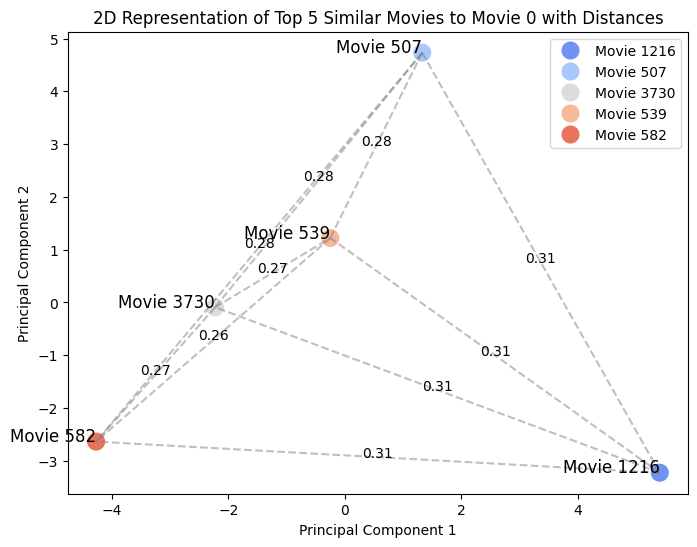

In [413]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

# Compute cosine similarity
cosine_sim = cosine_similarity(vectors)  # Shape: (4806, 4806)

# Movie indices (Replace with actual movie names if available)
movie_indices = [f"Movie {i}" for i in range(len(vectors))]

# Convert to DataFrame
cosine_df = pd.DataFrame(cosine_sim, index=movie_indices, columns=movie_indices)

# Select a target movie (e.g., "Movie 0")
target_movie = "Movie 0"  # Change this to any movie

# Get top 5 most similar movies (excluding itself)
top_5_similarities = cosine_df[target_movie].sort_values(ascending=False)[1:6]
top_5_indices = top_5_similarities.index
top_5_scores = top_5_similarities.values  # Similarity scores

# Extract corresponding vectors
top_5_vectors = vectors[[movie_indices.index(movie) for movie in top_5_indices]]

# Apply PCA for 2D visualization (reduce 4000 dimensions to 2)
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(top_5_vectors)

# Convert to DataFrame for plotting
plot_df = pd.DataFrame(reduced_vectors, columns=["PC1", "PC2"])
plot_df["Movie"] = top_5_indices  # Add movie names

# Plot the movies in 2D space
plt.figure(figsize=(8, 6))
sns.scatterplot(x="PC1", y="PC2", data=plot_df, hue="Movie", palette="coolwarm", s=200)

# Connect points with lines and show similarity scores
for i in range(len(plot_df)):
    for j in range(i + 1, len(plot_df)):  # Avoid duplicate lines
        x_values = [plot_df.iloc[i]["PC1"], plot_df.iloc[j]["PC1"]]
        y_values = [plot_df.iloc[i]["PC2"], plot_df.iloc[j]["PC2"]]
        plt.plot(x_values, y_values, "gray", linestyle="--", alpha=0.5)

        # Show similarity score on the line
        mid_x = (x_values[0] + x_values[1]) / 2
        mid_y = (y_values[0] + y_values[1]) / 2
        plt.text(mid_x, mid_y, f"{top_5_scores[i]:.2f}", fontsize=10, ha="center", color="black")

# Annotate points with movie names
for i, row in plot_df.iterrows():
    plt.text(row["PC1"], row["PaC2"], row["Movie"], fontsize=12, ha="right")

plt.title(f"2D Representation of Top 5 Similar Movies to {target_movie} with Distances")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

## 3D Representation of Top 5 Similar Movies to Movies with Distances

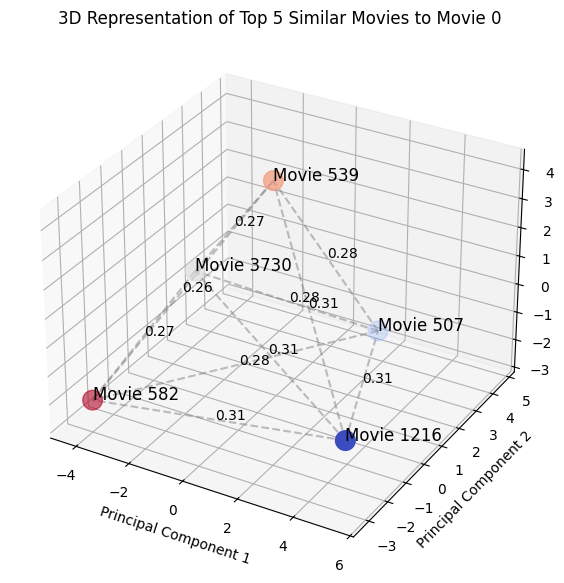

In [414]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

# Compute cosine similarity
cosine_sim = cosine_similarity(vectors)  # Shape: (4806, 4806)

# Movie indices (Replace with actual movie names if available)
movie_indices = [f"Movie {i}" for i in range(len(vectors))]

# Convert to DataFrame
cosine_df = pd.DataFrame(cosine_sim, index=movie_indices, columns=movie_indices)

# Select a target movie (e.g., "Movie 0")
target_movie = "Movie 0"  # Change this to any movie

# Get top 5 most similar movies (excluding itself)
top_5_similarities = cosine_df[target_movie].sort_values(ascending=False)[1:6]
top_5_indices = top_5_similarities.index
top_5_scores = top_5_similarities.values  # Similarity scores

# Extract corresponding vectors
top_5_vectors = vectors[[movie_indices.index(movie) for movie in top_5_indices]]

# Apply PCA for 3D visualization (reduce 4000 dimensions to 3)
pca = PCA(n_components=3)
reduced_vectors = pca.fit_transform(top_5_vectors)

# Convert to DataFrame for plotting
plot_df = pd.DataFrame(reduced_vectors, columns=["PC1", "PC2", "PC3"])
plot_df["Movie"] = top_5_indices  # Add movie names

# Create 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Scatter plot
scatter = ax.scatter(plot_df["PC1"], plot_df["PC2"], plot_df["PC3"], s=200, c=range(len(plot_df)), cmap="coolwarm", label=plot_df["Movie"])

# Annotate points with movie names
for i, row in plot_df.iterrows():
    ax.text(row["PC1"], row["PC2"], row["PC3"], row["Movie"], fontsize=12)

# Connect points with lines and show similarity scores
for i in range(len(plot_df)):
    for j in range(i + 1, len(plot_df)):  # Avoid duplicate lines
        x_values = [plot_df.iloc[i]["PC1"], plot_df.iloc[j]["PC1"]]
        y_values = [plot_df.iloc[i]["PC2"], plot_df.iloc[j]["PC2"]]
        z_values = [plot_df.iloc[i]["PC3"], plot_df.iloc[j]["PC3"]]
        ax.plot(x_values, y_values, z_values, "gray", linestyle="--", alpha=0.5)

        # Show similarity score at the midpoint
        mid_x = (x_values[0] + x_values[1]) / 2
        mid_y = (y_values[0] + y_values[1]) / 2
        mid_z = (z_values[0] + z_values[1]) / 2
        ax.text(mid_x, mid_y, mid_z, f"{top_5_scores[i]:.2f}", fontsize=10, color="black")

# Set labels
ax.set_title(f"3D Representation of Top 5 Similar Movies to {target_movie}")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

plt.show()

## 3D Representation of Top 5 Similar Movies to Movies with Distances

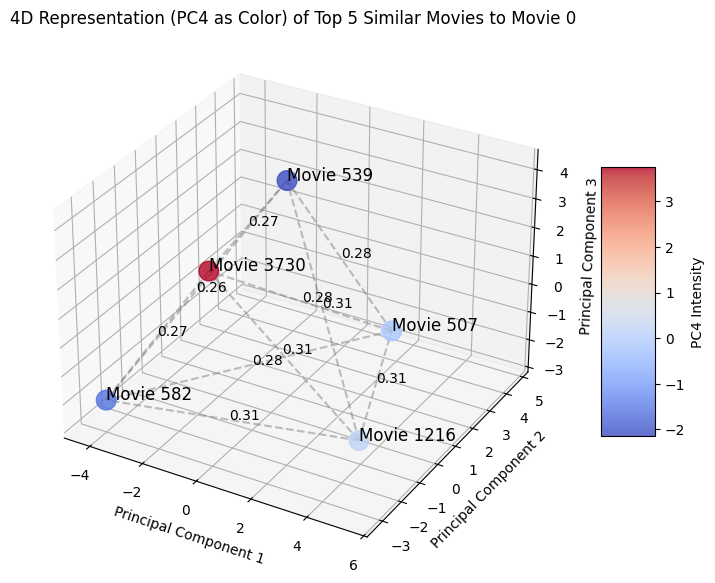

In [415]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

# Compute cosine similarity
cosine_sim = cosine_similarity(vectors)  # Shape: (4806, 4806)

# Movie indices (Replace with actual movie names if available)
movie_indices = [f"Movie {i}" for i in range(len(vectors))]

# Convert to DataFrame
cosine_df = pd.DataFrame(cosine_sim, index=movie_indices, columns=movie_indices)

# Select a target movie (e.g., "Movie 0")
target_movie = "Movie 0"  # Change this to any movie

# Get top 5 most similar movies (excluding itself)
top_5_similarities = cosine_df[target_movie].sort_values(ascending=False)[1:6]
top_5_indices = top_5_similarities.index
top_5_scores = top_5_similarities.values  # Similarity scores

# Extract corresponding vectors
top_5_vectors = vectors[[movie_indices.index(movie) for movie in top_5_indices]]

# Apply PCA for 4D reduction (reduce 4000 dimensions to 4)
pca = PCA(n_components=4)
reduced_vectors = pca.fit_transform(top_5_vectors)

# Convert to DataFrame for plotting
plot_df = pd.DataFrame(reduced_vectors, columns=["PC1", "PC2", "PC3", "PC4"])
plot_df["Movie"] = top_5_indices  # Add movie names

# Create 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

# Use PC4 as color intensity
colors = plot_df["PC4"]  # Fourth dimension

# Scatter plot
scatter = ax.scatter(
    plot_df["PC1"], plot_df["PC2"], plot_df["PC3"], 
    c=colors, cmap="coolwarm", s=200, alpha=0.8
)

# Annotate points with movie names
for i, row in plot_df.iterrows():
    ax.text(row["PC1"], row["PC2"], row["PC3"], row["Movie"], fontsize=12)

# Connect points with lines and show similarity scores
for i in range(len(plot_df)):
    for j in range(i + 1, len(plot_df)):  # Avoid duplicate lines
        x_values = [plot_df.iloc[i]["PC1"], plot_df.iloc[j]["PC1"]]
        y_values = [plot_df.iloc[i]["PC2"], plot_df.iloc[j]["PC2"]]
        z_values = [plot_df.iloc[i]["PC3"], plot_df.iloc[j]["PC3"]]
        ax.plot(x_values, y_values, z_values, "gray", linestyle="--", alpha=0.5)

        # Show similarity score at the midpoint
        mid_x = (x_values[0] + x_values[1]) / 2
        mid_y = (y_values[0] + y_values[1]) / 2
        mid_z = (z_values[0] + z_values[1]) / 2
        ax.text(mid_x, mid_y, mid_z, f"{top_5_scores[i]:.2f}", fontsize=10, color="black")

# Set labels
ax.set_title(f"4D Representation (PC4 as Color) of Top 5 Similar Movies to {target_movie}")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

# Add colorbar to represent PC4 values
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
cbar.set_label("PC4 Intensity")

plt.show()

## Model Save

In [419]:
import pickle

# Assuming 'similarity' is your cosine similarity matrix
with open('movie_recommendation.pkl', 'wb') as f:
    pickle.dump(simliarity, f)

## Movie Recommendation System: Challenges

**1. Merging Two Datasets –** Combining multiple datasets can lead to inconsistencies, missing values, and duplicate entries, making it difficult to align data properly for training the model.

**2. Unnecessary Columns –** Raw datasets often contain irrelevant columns that do not contribute to the recommendation system, increasing computational complexity and reducing model efficiency.

**3. Data Preprocessing –** Handling missing values, removing duplicates, tokenizing text, and normalizing features are essential to ensure the data is clean and structured for analysis.

**4. High Data Volume –** Large datasets increase processing time and require efficient techniques like dimensionality reduction, sparse matrix representations, or distributed computing to manage memory efficiently.

**5. Many String Columns –** Text-based columns like genres, cast, and overview need transformation using techniques such as TF-IDF, CountVectorizer, or word embeddings to convert them into numerical features for machine learning models.

**6. Poor Model Performance –** Low precision and recall indicate that the recommendations may not be relevant. Optimizing feature selection, hyperparameters, similarity metrics (e.g., Cosine Similarity, Jaccard Similarity), and alternative models (like deep learning-based recommendations) can improve accuracy.

## Movie Recommendation System: Solutions

**1. Handle Missing Values and Duplicates –** Clean the dataset by removing duplicates and filling missing values appropriately to ensure data consistency.

**2. Drop Unnecessary Columns –** Keep only relevant columns that contribute to the recommendation system to reduce computational complexity.

**3. Optimize Data Processing –** Convert text-based features (e.g., genres, cast, overview) into numerical vectors using TF-IDF, CountVectorizer, or word embeddings for better model training.

**4. Reduce High Dimensionality –** Apply dimensionality reduction techniques like TruncatedSVD to make similarity computations faster and more efficient.

**5. Improve Similarity Calculation –** Experiment with alternative similarity measures such as Jaccard Similarity, Pearson Correlation, or deep learning-based models for better recommendation accuracy.

**6. Tune the Model for Better Performance –** Optimize feature selection, hyperparameters, and evaluation metrics like Precision, Recall, and NDCG to improve recommendation quality.

<div style="text-align: center; font-size: 24px; font-weight: bold;">
    Thank You
</div>